In [1]:
from sklearn.datasets import load_iris
data=load_iris()
X=data.data[:,2:]
y=data.target

feature_names=data.feature_names[2:]

In [2]:
import os

os.environ["PATH"] += os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin/'


In [3]:
import io
from sklearn import tree
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image,display
import pydotplus

In [9]:
def draw_decision_tree(model):
    dot_data=tree.export_graphviz(model, out_file=None, feature_names=feature_names,
    filled=True, rounded=True, special_characters=True)
    graph=pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers=('s','^','o')
    colors=('red','blue','lightgreen')
    cmap=mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1,xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min,x2_max, resolution))
    Z=model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1,xx2,Z,colors='k')
    plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl,1],alpha=0.8,c=[cmap(idx)],
        marker=markers[idx],s=80,label=cl)
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z

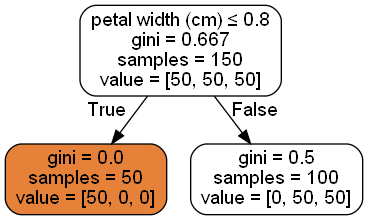

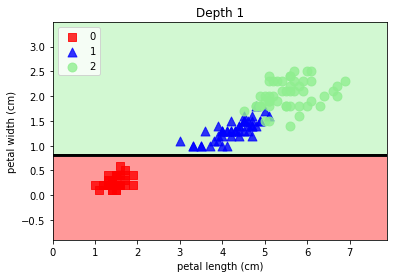

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


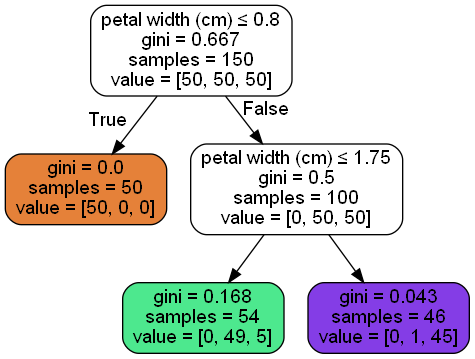

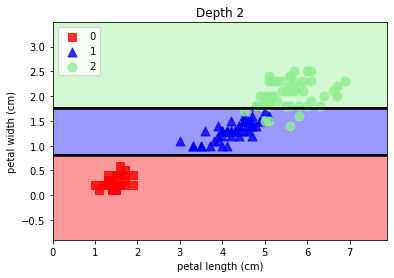

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


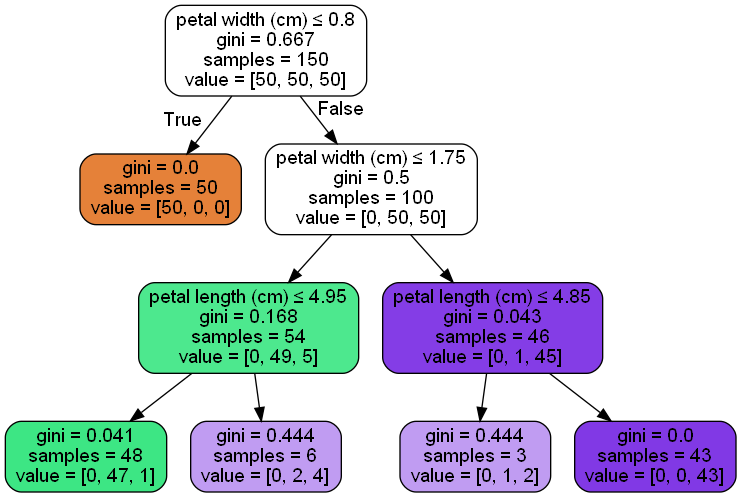

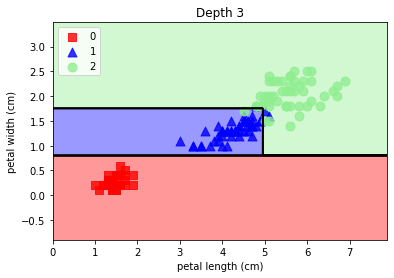

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


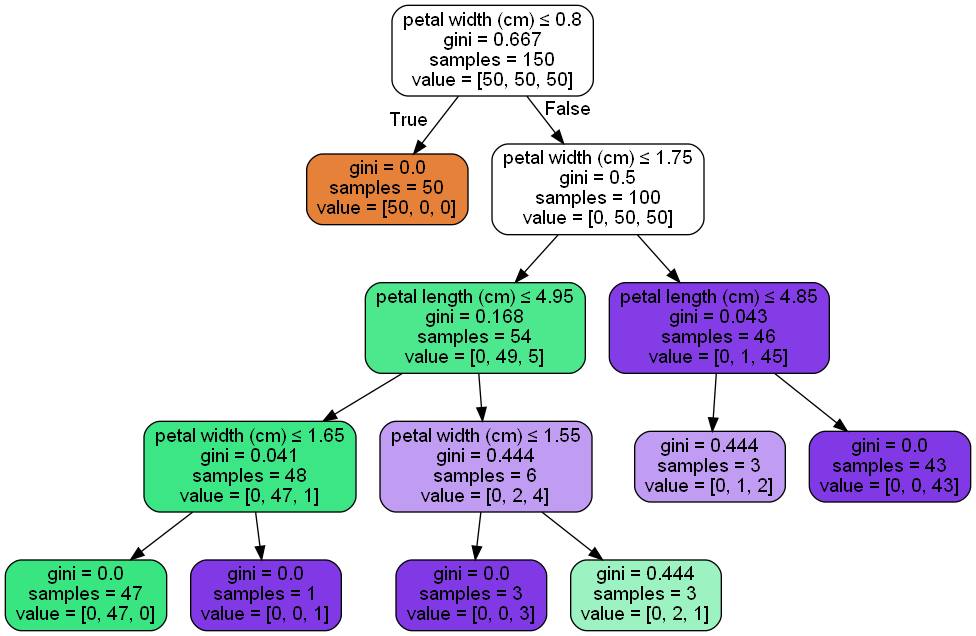

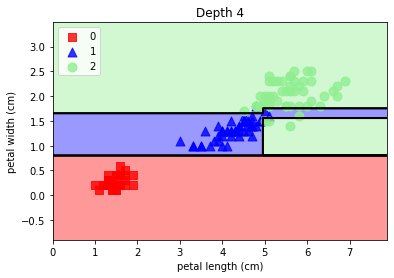

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


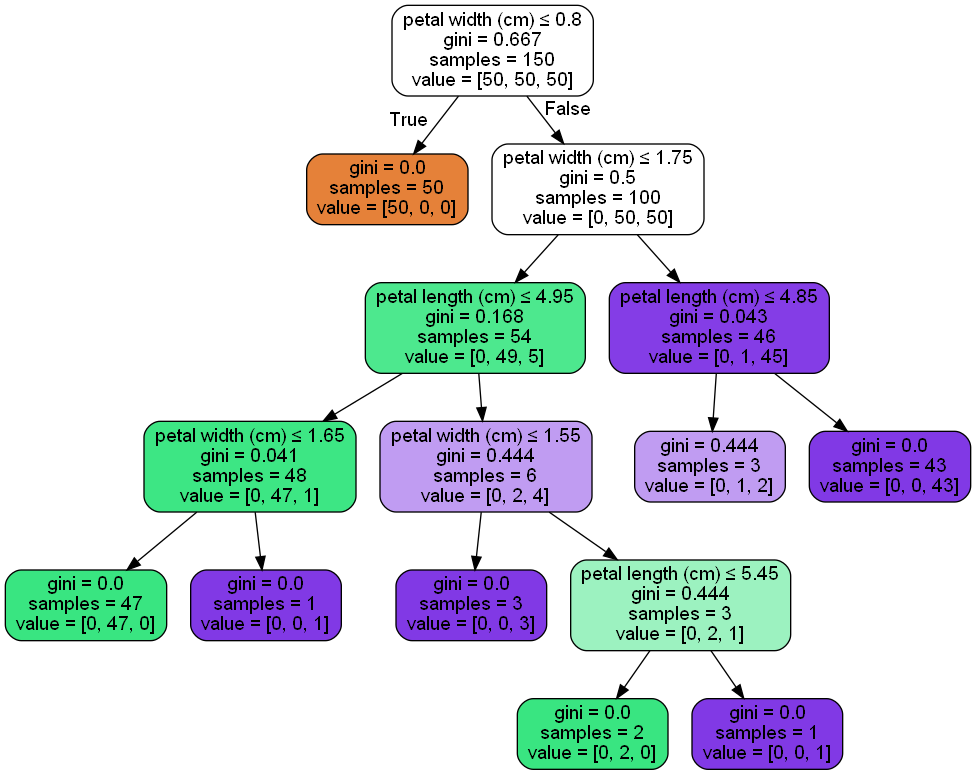

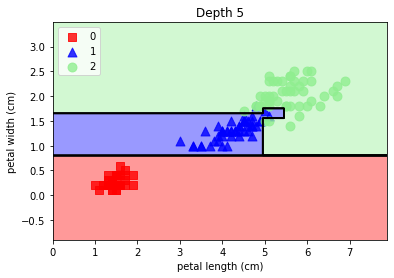

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

for i in range(1,6):
    plt.figure()
    model=DecisionTreeClassifier(max_depth=i,random_state=0).fit(X,y)
    display(draw_decision_tree(model))
    plot_decision_regions(X,y,model, f"Depth {i}")
    plt.show()
    print(confusion_matrix(y, model.predict(X)))

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [13]:
from sklearn.model_selection import KFold, cross_val_score

cv=KFold(5, shuffle=True, random_state=0)
i=1
train_scores=[]
test_scores=[]
for train_index, test_index in cv.split(X,y):
    print(i,'fold')
    X_train, X_test=X[train_index,], X[test_index,]
    y_train, y_test= y[train_index], y[test_index]
    model=DecisionTreeClassifier(random_state=0)
    model.fit(X_train,y_train)
    score=model.score(X_train, y_train)
    print(score)
    train_scores.append(score)
    score=model.score(X_test, y_test)
    print(score)
    test_scores.append(score)
    i+=1

print('\naverage')
print(np.mean(train_scores))
print(np.mean(test_scores))

model = DecisionTreeClassifier(random_state=0)
cross_val_score(model, X, y, scoring="accuracy", cv=cv).mean()

1 fold
0.9916666666666667
0.9666666666666667
2 fold
0.9916666666666667
0.9
3 fold
0.9916666666666667
1.0
4 fold
0.9916666666666667
0.9333333333333333
5 fold
1.0
0.9333333333333333

average
0.9933333333333334
0.9466666666666667


0.9466666666666667